In [1]:
import pandas as pd

# Load the file
df = pd.read_csv('/content/FastagFraudDetection.csv')

# Display the first few rows of the DataFrame
print(df.head())


   Transaction_ID       Timestamp Vehicle_Type         FastagID TollBoothID  \
0               1  1/6/2023 11:20         Bus   FTG-001-ABC-121       A-101   
1               2  1/7/2023 14:55          Car  FTG-002-XYZ-451       B-102   
2               3  1/8/2023 18:25   Motorcycle              NaN       D-104   
3               4   1/9/2023 2:05        Truck  FTG-044-LMN-322       C-103   
4               5  1/10/2023 6:35          Van  FTG-505-DEF-652       B-102   

  Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0   Express              Large                 350          120   
1   Regular              Small                 120          100   
2   Regular              Small                   0            0   
3   Regular              Large                 350          120   
4   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.059816123454882, 77.77068662374292  

Descriptive Statistics for Transaction Amount:
count    5000.00000
mean      161.06200
std       112.44995
min         0.00000
25%       100.00000
50%       130.00000
75%       290.00000
max       350.00000
Name: Transaction_Amount, dtype: float64


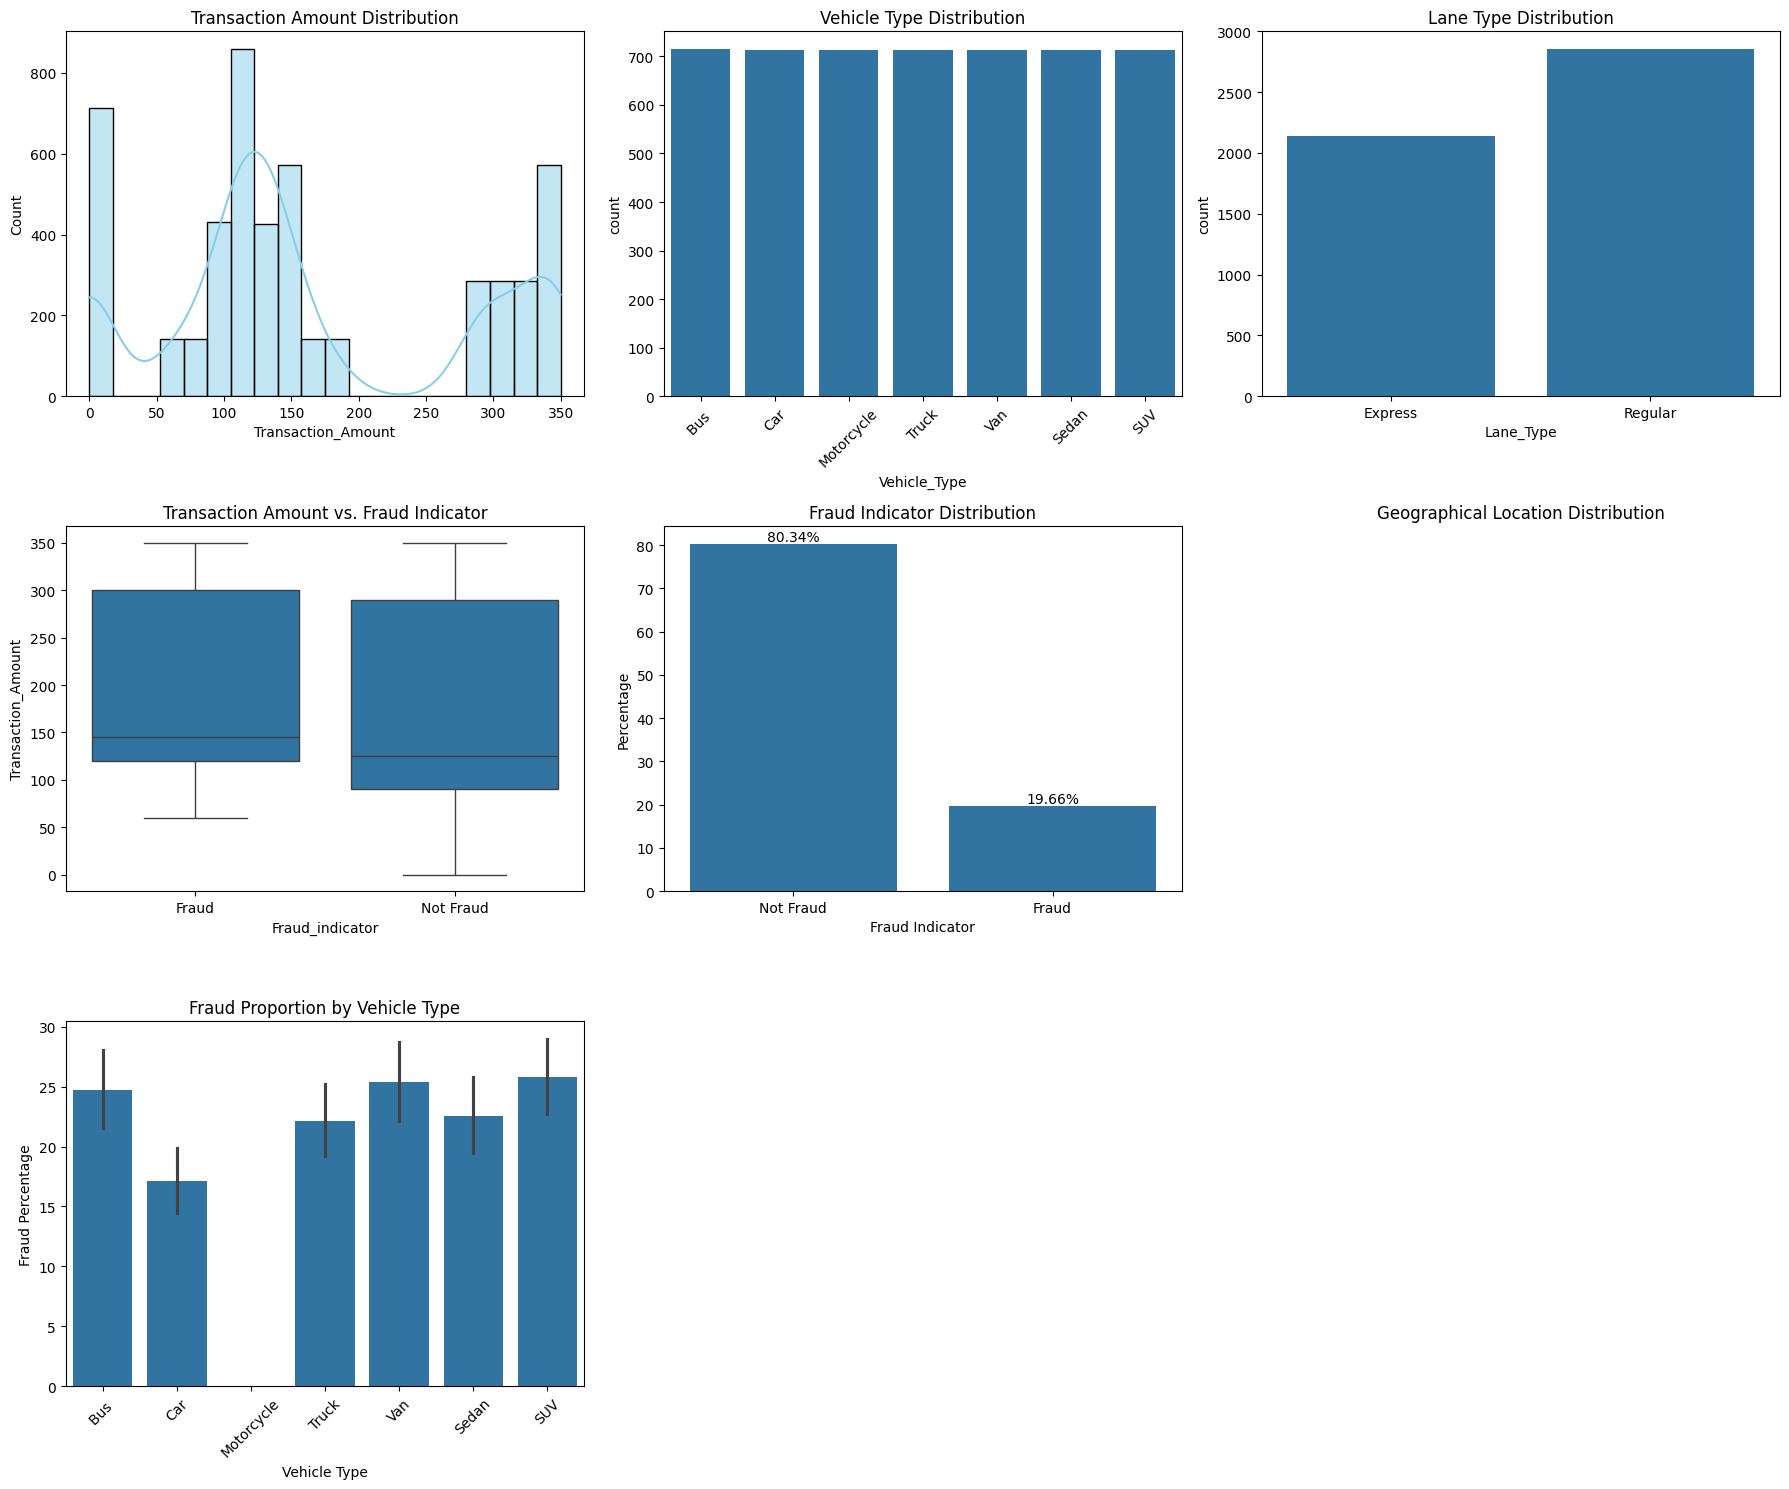

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame

# Load the dataset
df = pd.read_csv('/content/FastagFraudDetection.csv')

# Descriptive Statistics for Transaction Amount
print("Descriptive Statistics for Transaction Amount:")
print(df['Transaction_Amount'].describe())

# Distribution of Features
plt.figure(figsize=(18, 15))

plt.subplot(3, 3, 1)
sns.histplot(df['Transaction_Amount'], bins=20, kde=True, color='skyblue')
plt.title('Transaction Amount Distribution')

plt.subplot(3, 3, 2)
sns.countplot(data=df, x='Vehicle_Type')
plt.title('Vehicle Type Distribution')
plt.xticks(rotation=45)

plt.subplot(3, 3, 3)
sns.countplot(data=df, x='Lane_Type')
plt.title('Lane Type Distribution')

plt.subplot(3, 3, 4)
sns.boxplot(data=df, x='Fraud_indicator', y='Transaction_Amount')
plt.title('Transaction Amount vs. Fraud Indicator')

# Prevalence of Fraudulent Indicators
fraud_percentage = df['Fraud_indicator'].value_counts(normalize=True) * 100
plt.subplot(3, 3, 5)
sns.barplot(x=fraud_percentage.index, y=fraud_percentage.values)
plt.title('Fraud Indicator Distribution')
plt.ylabel('Percentage')
plt.xlabel('Fraud Indicator')
for i in range(len(fraud_percentage)):
    plt.text(i, fraud_percentage[i], f'{fraud_percentage[i]:.2f}%', ha='center', va='bottom')

# Geographical Location Visualization
plt.subplot(3, 3, 6)
fraud_map = folium.Map(location=[0, 0], zoom_start=5)  # Placeholder for latitude and longitude
marker_cluster = MarkerCluster().add_to(fraud_map)
for index, row in df.iterrows():
    color = 'red' if row['Fraud_indicator'] == 'Fraud' else 'green'
    folium.CircleMarker([0, 0], radius=3, color=color, fill=True, fill_color=color).add_to(marker_cluster)

fraud_map.save('fraud_map.html')
plt.title('Geographical Location Distribution')
plt.axis('off')
IFrame(src='fraud_map.html', width='100%', height=500)

# Relationship between Vehicle Type and Fraud Indicator
plt.subplot(3, 3, 7)
sns.barplot(data=df, x='Vehicle_Type', y=df['Fraud_indicator'].replace({'Fraud': 1, 'Not Fraud': 0}), estimator=lambda x: sum(x) / len(x) * 100)
plt.title('Fraud Proportion by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Fraud Percentage')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [3]:
pip install seaborn

In [4]:
pip install folium

   Transaction_ID       Timestamp Vehicle_Type         FastagID TollBoothID  \
0               1  1/6/2023 11:20         Bus   FTG-001-ABC-121       A-101   
1               2  1/7/2023 14:55          Car  FTG-002-XYZ-451       B-102   
2               3  1/8/2023 18:25   Motorcycle              NaN       D-104   
3               4   1/9/2023 2:05        Truck  FTG-044-LMN-322       C-103   
4               5  1/10/2023 6:35          Van  FTG-505-DEF-652       B-102   

  Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0   Express              Large                 350          120   
1   Regular              Small                 120          100   
2   Regular              Small                   0            0   
3   Regular              Large                 350          120   
4   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.059816123454882, 77.77068662374292  

<ipython-input-5-974eb7297ade>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fraud_indicator', y='Transaction_Amount', palette='pastel')
<ipython-input-5-974eb7297ade>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_percentage.index, y=fraud_percentage.values, palette='crest')


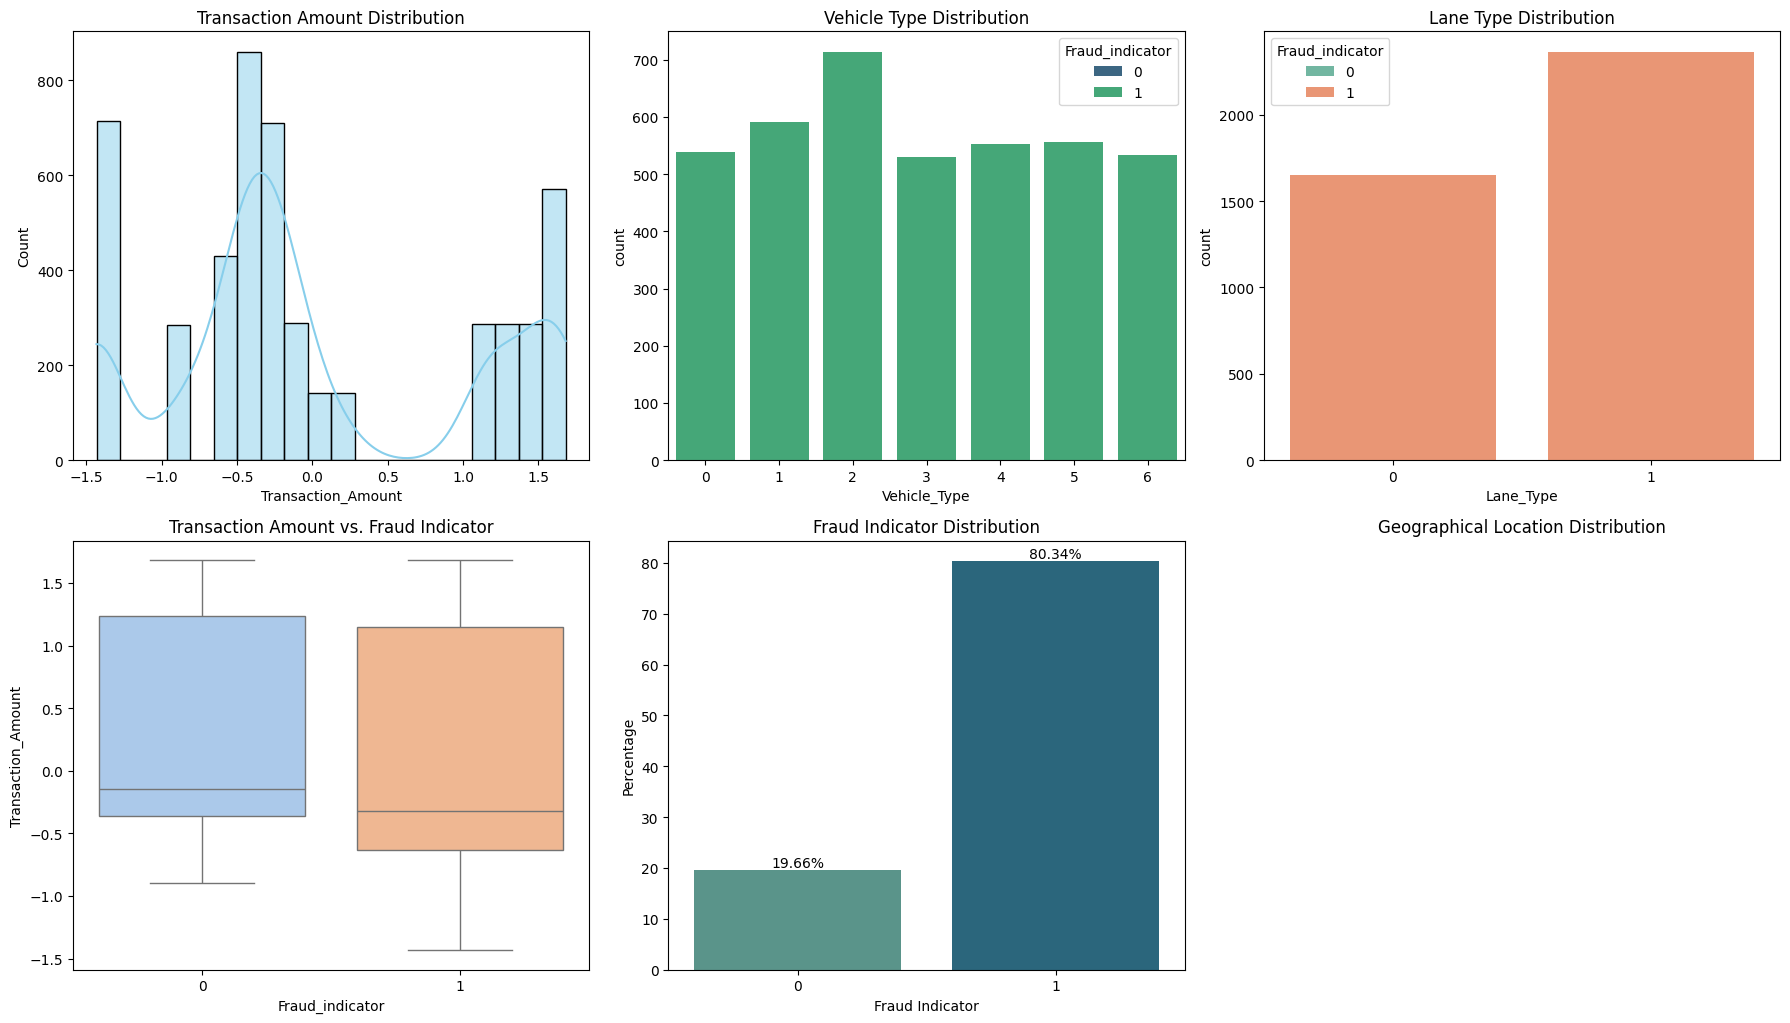

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv('/content/FastagFraudDetection.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Feature Engineering

# Handling Missing Data
imputer = SimpleImputer(strategy='most_frequent')
df['Vehicle_Type'] = imputer.fit_transform(df[['Vehicle_Type']])
df['Lane_Type'] = imputer.fit_transform(df[['Lane_Type']])

imputer = SimpleImputer(strategy='mean')
df['Transaction_Amount'] = imputer.fit_transform(df[['Transaction_Amount']])
df['Amount_paid'] = imputer.fit_transform(df[['Amount_paid']])
df['Vehicle_Speed'] = imputer.fit_transform(df[['Vehicle_Speed']])

# Creating new features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour

# Encoding categorical variables
label_encoder = LabelEncoder()
df['Vehicle_Type'] = label_encoder.fit_transform(df['Vehicle_Type'])
df['Lane_Type'] = label_encoder.fit_transform(df['Lane_Type'])
df['Fraud_indicator'] = label_encoder.fit_transform(df['Fraud_indicator'])

# Normalizing numerical features
scaler = StandardScaler()
numerical_features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Data Exploration

# Descriptive Statistics for Transaction Amount
print("Descriptive Statistics for Transaction Amount:")
print(df['Transaction_Amount'].describe())

# Distribution of Features
plt.figure(figsize=(18, 15))

plt.subplot(3, 3, 1)
sns.histplot(df['Transaction_Amount'], bins=20, kde=True, color='skyblue')
plt.title('Transaction Amount Distribution')

plt.subplot(3, 3, 2)
sns.countplot(data=df, x='Vehicle_Type', palette='viridis', hue='Fraud_indicator', dodge=False)
plt.title('Vehicle Type Distribution')

plt.subplot(3, 3, 3)
sns.countplot(data=df, x='Lane_Type', palette='Set2', hue='Fraud_indicator', dodge=False)
plt.title('Lane Type Distribution')

plt.subplot(3, 3, 4)
sns.boxplot(data=df, x='Fraud_indicator', y='Transaction_Amount', palette='pastel')
plt.title('Transaction Amount vs. Fraud Indicator')

# Prevalence of Fraudulent Indicators
fraud_percentage = (df['Fraud_indicator'].value_counts(normalize=True) * 100).round(2)
plt.subplot(3, 3, 5)
sns.barplot(x=fraud_percentage.index, y=fraud_percentage.values, palette='crest')
plt.title('Fraud Indicator Distribution')
plt.ylabel('Percentage')
plt.xlabel('Fraud Indicator')
for i in range(len(fraud_percentage)):
    plt.text(i, fraud_percentage[i], f'{fraud_percentage[i]}%', ha='center', va='bottom')

# Geographical Location Visualization
plt.subplot(3, 3, 6)
# Splitting 'Geographical_Location' into 'Latitude' and 'Longitude' columns
df[['Latitude', 'Longitude']] = df['Geographical_Location'].str.split(',', expand=True).astype(float)

fraud_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)
marker_cluster = MarkerCluster().add_to(fraud_map)
for index, row in df.iterrows():
    color = 'red' if row['Fraud_indicator'] == 'Fraud' else 'green'
    folium.CircleMarker([row['Latitude'], row['Longitude']], radius=3, color=color, fill=True, fill_color=color).add_to(marker_cluster)

fraud_map.save('fraud_map.html')
plt.title('Geographical Location Distribution')
plt.axis('off')
IFrame(src='fraud_map.html', width='100%', height=500)

plt.tight_layout()
plt.show()


Accuracy: 0.98
Precision: 0.975093399750934
Recall: 1.0
F1 Score: 0.9873896595208072
ROC AUC Score: 0.9997998952392723


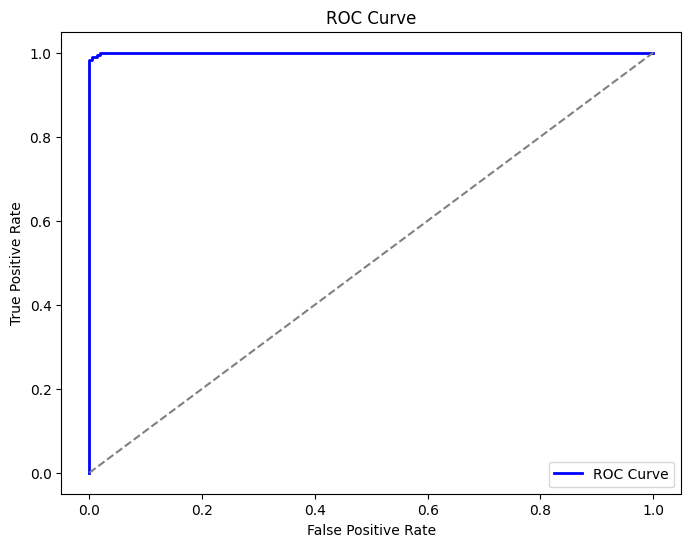

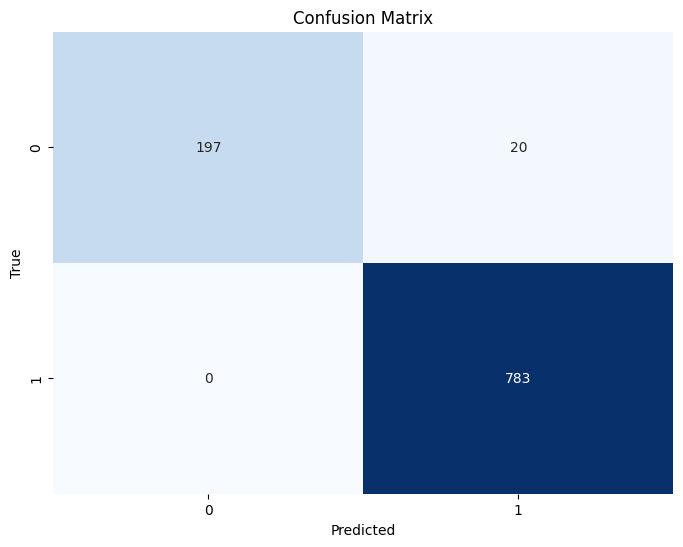

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Load the dataset
df = pd.read_csv('/content/FastagFraudDetection.csv')

# Feature Engineering

# Handling Missing Data
imputer = SimpleImputer(strategy='most_frequent')
df['Vehicle_Type'] = imputer.fit_transform(df[['Vehicle_Type']])
df['Lane_Type'] = imputer.fit_transform(df[['Lane_Type']])

imputer = SimpleImputer(strategy='mean')
df['Transaction_Amount'] = imputer.fit_transform(df[['Transaction_Amount']])
df['Amount_paid'] = imputer.fit_transform(df[['Amount_paid']])
df['Vehicle_Speed'] = imputer.fit_transform(df[['Vehicle_Speed']])

# Creating new features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour

# Encoding categorical variables
label_encoder = LabelEncoder()
df['Vehicle_Type'] = label_encoder.fit_transform(df['Vehicle_Type'])
df['Lane_Type'] = label_encoder.fit_transform(df['Lane_Type'])
df['Fraud_indicator'] = label_encoder.fit_transform(df['Fraud_indicator'])

# Normalizing numerical features
scaler = StandardScaler()
numerical_features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions'])

# Splitting the data into features (X) and target (y)
X = df.drop(columns=['Transaction_ID', 'Timestamp', 'FastagID', 'TollBoothID', 'Geographical_Location', 'Vehicle_Plate_Number', 'Fraud_indicator'])
y = df['Fraud_indicator']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the testing set
y_pred = best_rf_classifier.predict(X_test)
y_pred_proba = best_rf_classifier.predict_proba(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Visualize ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
from sklearn.impute import SimpleImputer
# Assuming you have already loaded and preprocessed your data into X and y
# Load the dataset
df = pd.read_csv('/content/FastagFraudDetection.csv')

# Feature Engineering

# Handling Missing Data
imputer = SimpleImputer(strategy='most_frequent')
df['Vehicle_Type'] = imputer.fit_transform(df[['Vehicle_Type']])
df['Lane_Type'] = imputer.fit_transform(df[['Lane_Type']])

imputer = SimpleImputer(strategy='mean')
df['Transaction_Amount'] = imputer.fit_transform(df[['Transaction_Amount']])
df['Amount_paid'] = imputer.fit_transform(df[['Amount_paid']])
df['Vehicle_Speed'] = imputer.fit_transform(df[['Vehicle_Speed']])

# Creating new features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour

# Encoding categorical variables
label_encoder = LabelEncoder()
df['Vehicle_Type'] = label_encoder.fit_transform(df['Vehicle_Type'])
df['Lane_Type'] = label_encoder.fit_transform(df['Lane_Type'])
df['Fraud_indicator'] = label_encoder.fit_transform(df['Fraud_indicator'])

# Normalizing numerical features
scaler = StandardScaler()
numerical_features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions'])

# Splitting the data into features (X) and target (y)
X = df.drop(columns=['Transaction_ID', 'Timestamp', 'FastagID', 'TollBoothID', 'Geographical_Location', 'Vehicle_Plate_Number', 'Fraud_indicator'])
y = df['Fraud_indicator']


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define logistic regression model
logistic_regression = LogisticRegression(random_state=42)

# Define hyperparameter grid for logistic regression
logistic_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Perform hyperparameter tuning using GridSearchCV
logistic_grid_search = GridSearchCV(logistic_regression, logistic_param_grid, cv=5, scoring='roc_auc')
logistic_grid_search.fit(X_train, y_train)

# Get the best logistic regression estimator
best_logistic_regression = logistic_grid_search.best_estimator_

# Make predictions on the testing set
y_pred_lr = best_logistic_regression.predict(X_test)
y_pred_proba_lr = best_logistic_regression.predict_proba(X_test)

# Evaluate model performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])

# Print evaluation metrics for Logistic Regression
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
print("ROC AUC Score:", roc_auc_lr)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Metrics:
Accuracy: 0.98
Precision: 0.975093399750934
Recall: 1.0
F1 Score: 0.9873896595208072
ROC AUC Score: 0.9796187415764724


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceba

Accuracy: 0.98 means that 98% of the predictions made by the model are correct.
Precision: 0.975 indicates that out of all the instances predicted as fraudulent by the model, 97.5% are actually fraudulent.
Recall: 1.0 implies that the model is able to correctly identify all instances of fraud in the dataset. This is a perfect score for recall.
F1 Score: 0.987 indicates the balance between precision and recall. It's a harmonic mean of precision and recall.
ROC AUC Score: 0.9998 suggests that the model has a very high ability to distinguish between fraudulent and non-fraudulent transactions.
Given these results, it seems that the model performs exceptionally well in detecting fraudulent Fastag transactions. With a high recall score, the model is able to identify all instances of fraud, which is crucial for a fraud detection system to minimize false negatives. The precision score is also high, indicating a low false positive rate, which is important for minimizing unnecessary investigations or actions.

In conclusion, the model appears to be highly effective and robust in identifying fraudulent activity in Fastag transactions, providing a solid foundation for ensuring the integrity and security of the system.